<a href="https://colab.research.google.com/github/maurawidya75/augmentation/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install networkx
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema - automóvel
velocidade = ctrl.Antecedent(np.arange(0, 200, 1), 'velocidade')
temperatura = ctrl.Antecedent(np.arange(16, 30, 1), 'temperatura')
consumo = ctrl.Consequent(np.arange(5, 25, 1), 'consumo')

# Cria automaticamente o mapeamento entre valores nítidos e difusos
# usando uma função de pertinência padrão (triângulo)
consumo.automf(names=['pequeno', 'médio', 'grande'])


# Cria as funções de pertinência usando tipos variados
velocidade['baixa'] = fuzz.trapmf(velocidade.universe, [0, 0, 30, 60])
velocidade['média'] = fuzz.trapmf(velocidade.universe, [50, 70, 120, 150])
velocidade['alta'] = fuzz.trapmf(velocidade.universe, [110, 140, 200, 200])

temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [16, 16, 20, 25])
temperatura['alta'] = fuzz.trapmf(temperatura.universe,[20, 25, 30, 50])


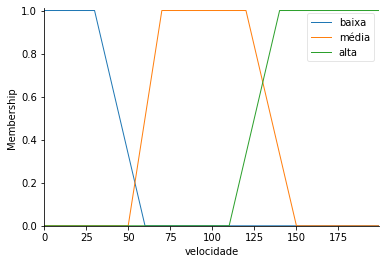

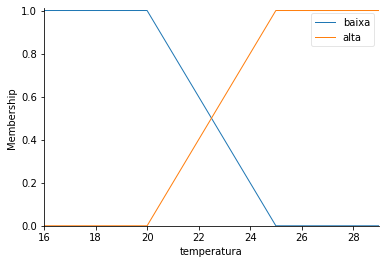

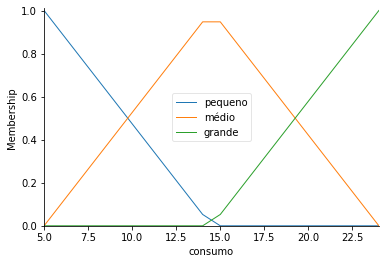

In [ ]:
velocidade.view()
temperatura.view()
consumo.view()

In [ ]:
rule1 = ctrl.Rule(velocidade['baixa'] & temperatura['baixa'], consumo['pequeno'])
rule2 = ctrl.Rule(velocidade['baixa'] & temperatura['alta'], consumo['pequeno'])
rule3 = ctrl.Rule(velocidade['média'] & temperatura['baixa'], consumo['grande'])
rule4 = ctrl.Rule(velocidade['média'] & temperatura['alta'], consumo['médio'])
rule5 = ctrl.Rule(velocidade['alta'] & temperatura['baixa'], consumo['grande'])
rule6 = ctrl.Rule(velocidade['alta'] & temperatura['alta'], consumo['grande'])

In [ ]:
consumo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
consumo_simulator= ctrl.ControlSystemSimulation(consumo_ctrl)

#Entrada de valores de velocidade e temperatura
consumo_simulator.input['velocidade'] = 110
consumo_simulator.input['temperatura'] = 22

#Resultado computado
consumo_simulator.compute()
print(consumo_simulator.output['consumo'])

16.17150182161652


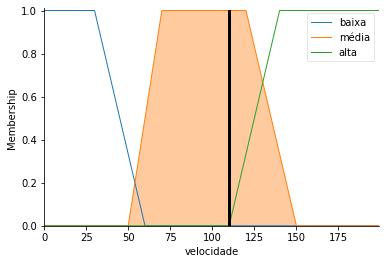

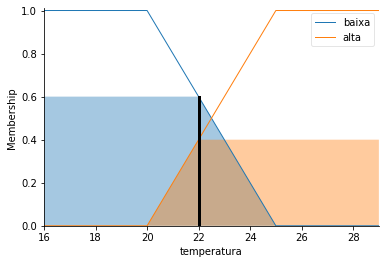

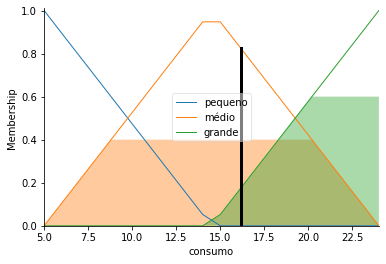

In [ ]:
velocidade.view(sim=consumo_simulator)
temperatura.view(sim=consumo_simulator)
consumo.view(sim=consumo_simulator)

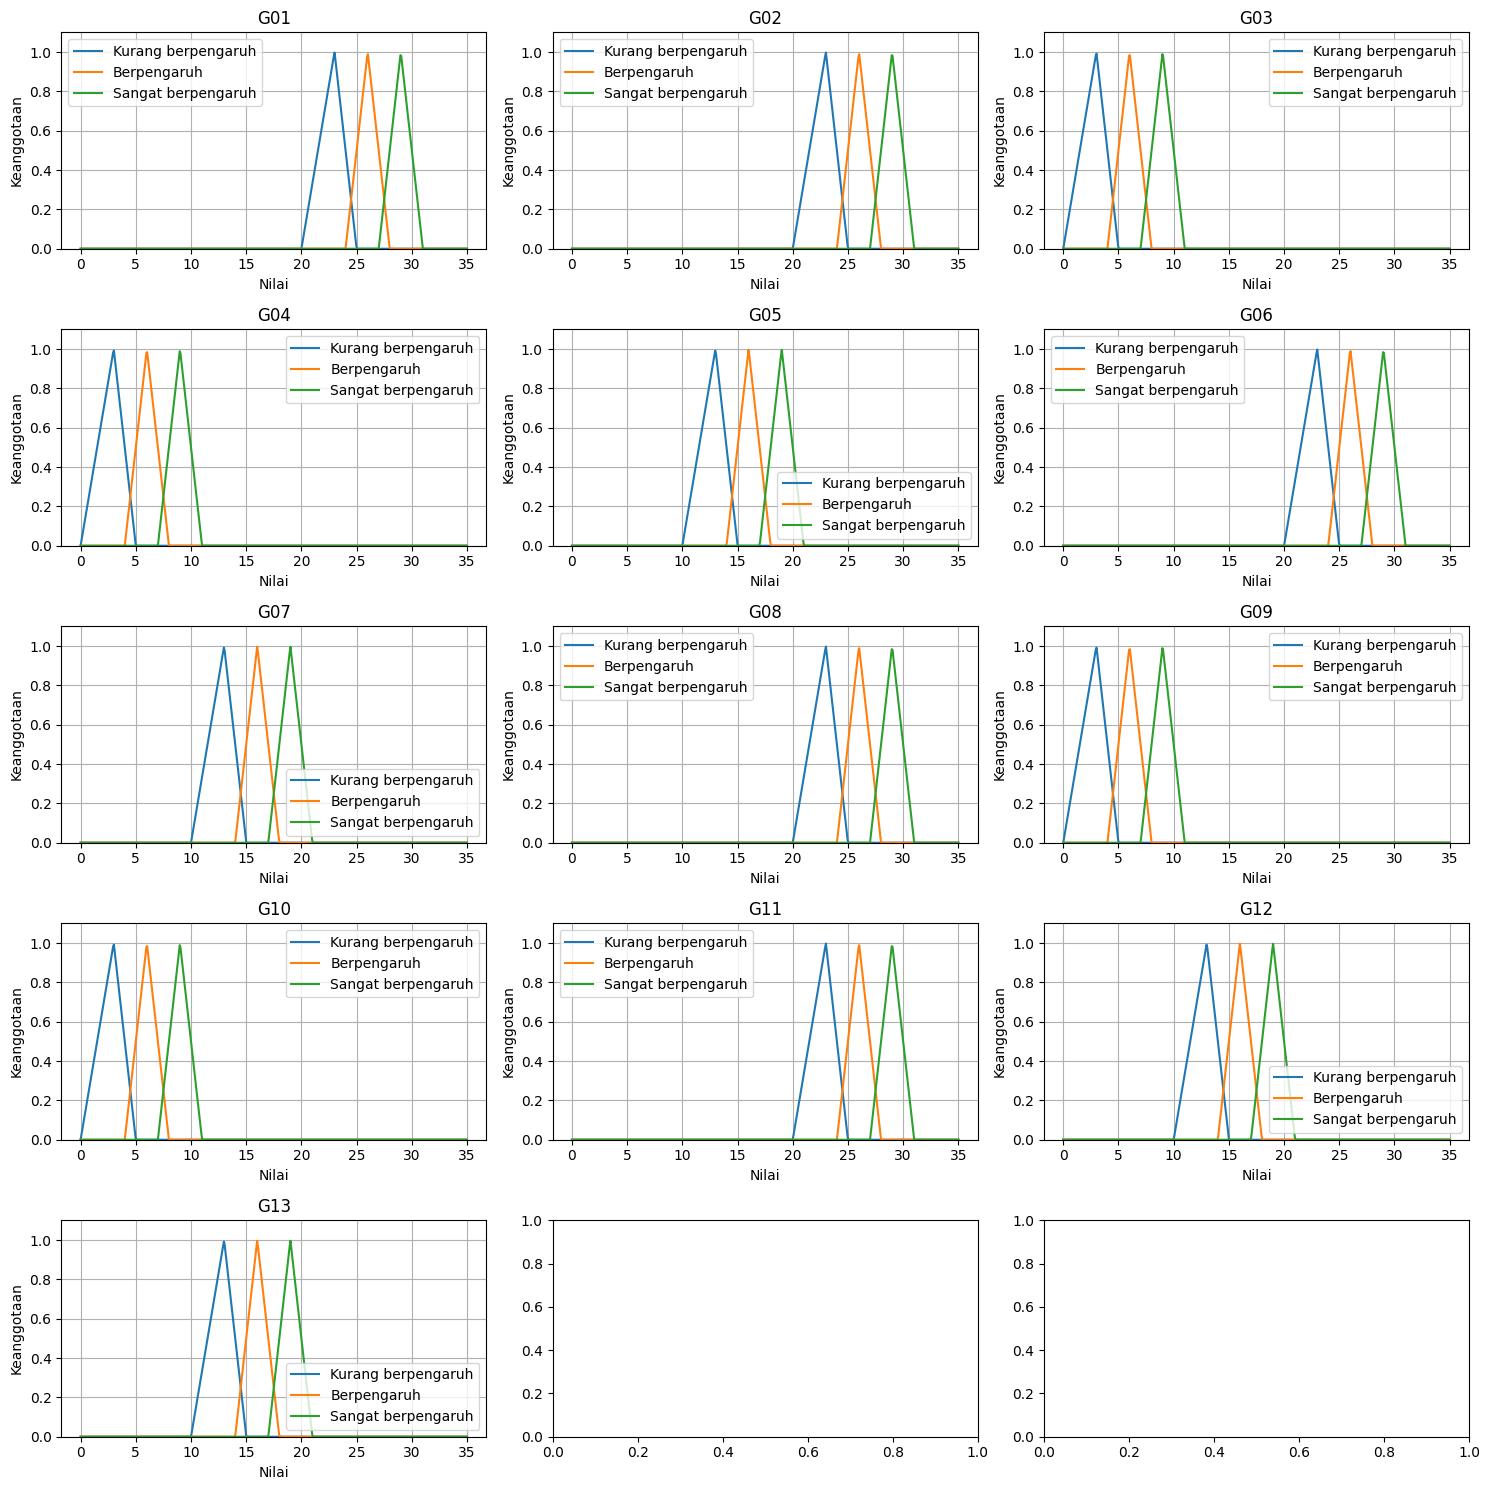

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi segitiga untuk keanggotaan fuzzy
def triangular_membership(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Rentang nilai
x_vals = np.linspace(0, 35, 500)

# Data keanggotaan fuzzy untuk setiap gejala
gejala_data = {
    'G01': {'Kurang berpengaruh': [20, 23, 25], 'Berpengaruh': [24, 26, 28], 'Sangat berpengaruh': [27, 29, 31]},
    'G02': {'Kurang berpengaruh': [20, 23, 25], 'Berpengaruh': [24, 26, 28], 'Sangat berpengaruh': [27, 29, 31]},
    'G03': {'Kurang berpengaruh': [0, 3, 5], 'Berpengaruh': [4, 6, 8], 'Sangat berpengaruh': [7, 9, 11]},
    'G04': {'Kurang berpengaruh': [0, 3, 5], 'Berpengaruh': [4, 6, 8], 'Sangat berpengaruh': [7, 9, 11]},
    'G05': {'Kurang berpengaruh': [10, 13, 15], 'Berpengaruh': [14, 16, 18], 'Sangat berpengaruh': [17, 19, 21]},
    'G06': {'Kurang berpengaruh': [20, 23, 25], 'Berpengaruh': [24, 26, 28], 'Sangat berpengaruh': [27, 29, 31]},
    'G07': {'Kurang berpengaruh': [10, 13, 15], 'Berpengaruh': [14, 16, 18], 'Sangat berpengaruh': [17, 19, 21]},
    'G08': {'Kurang berpengaruh': [20, 23, 25], 'Berpengaruh': [24, 26, 28], 'Sangat berpengaruh': [27, 29, 31]},
    'G09': {'Kurang berpengaruh': [0, 3, 5], 'Berpengaruh': [4, 6, 8], 'Sangat berpengaruh': [7, 9, 11]},
    'G10': {'Kurang berpengaruh': [0, 3, 5], 'Berpengaruh': [4, 6, 8], 'Sangat berpengaruh': [7, 9, 11]},
    'G11': {'Kurang berpengaruh': [20, 23, 25], 'Berpengaruh': [24, 26, 28], 'Sangat berpengaruh': [27, 29, 31]},
    'G12': {'Kurang berpengaruh': [10, 13, 15], 'Berpengaruh': [14, 16, 18], 'Sangat berpengaruh': [17, 19, 21]},
    'G13': {'Kurang berpengaruh': [10, 13, 15], 'Berpengaruh': [14, 16, 18], 'Sangat berpengaruh': [17, 19, 21]}
}

# Membuat plot keanggotaan fuzzy untuk semua gejala
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (gejala, categories) in enumerate(gejala_data.items()):
    ax = axes[idx]
    ax.set_title(gejala)
    for category, (a, b, c) in categories.items():
        y_vals = triangular_membership(x_vals, a, b, c)
        ax.plot(x_vals, y_vals, label=category)

    ax.set_xlabel("Nilai")
    ax.set_ylabel("Keanggotaan")
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


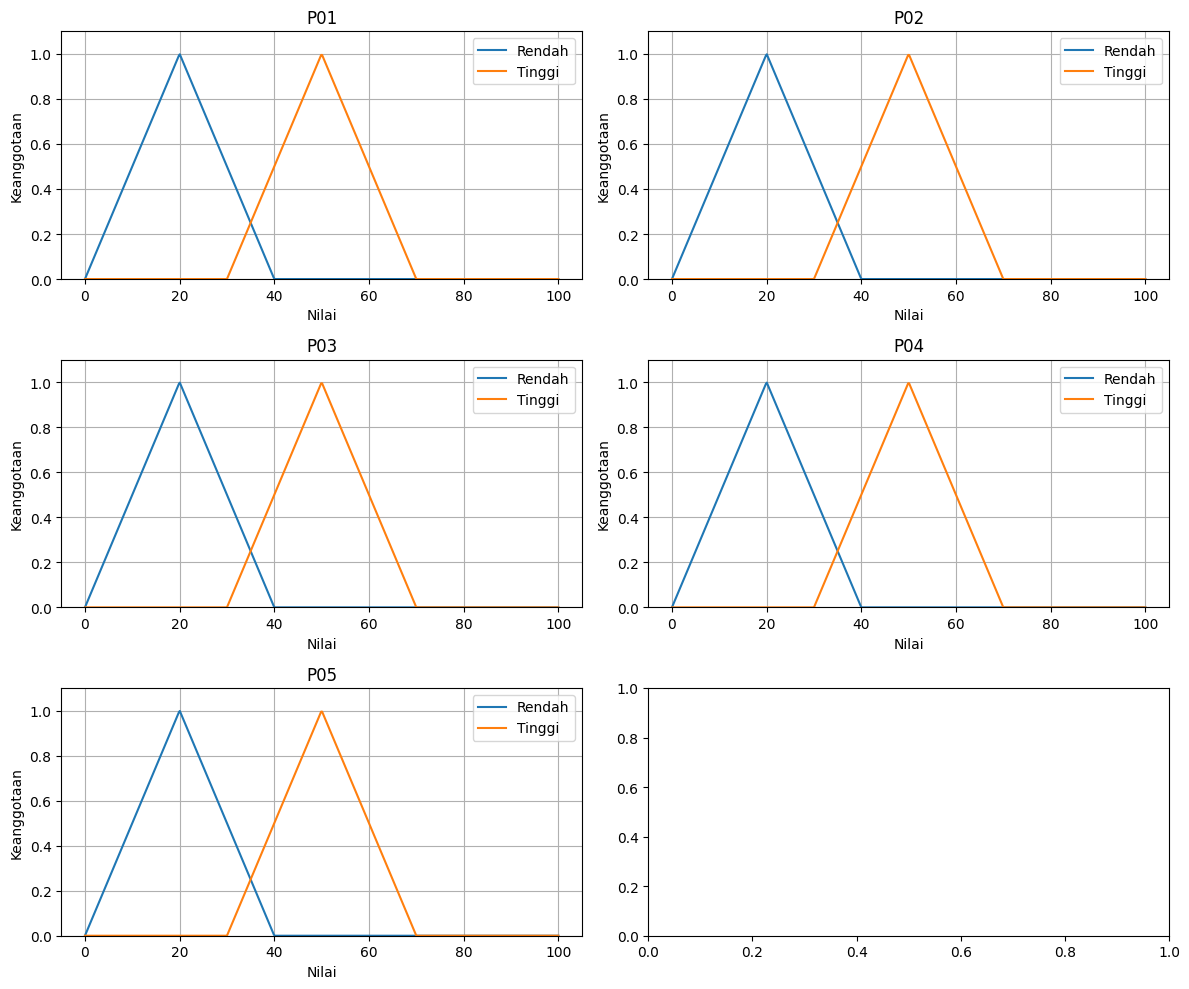

In [4]:
# Membuat keanggotaan fuzzy untuk variabel output (penyakit)
# Setiap penyakit memiliki dua tingkat keanggotaan: "Rendah" dan "Tinggi"

# Definisi fungsi keanggotaan fuzzy untuk penyakit
penyakit_data = {
    'P01': {'Rendah': [0, 20, 40], 'Tinggi': [30, 50, 70]},
    'P02': {'Rendah': [0, 20, 40], 'Tinggi': [30, 50, 70]},
    'P03': {'Rendah': [0, 20, 40], 'Tinggi': [30, 50, 70]},
    'P04': {'Rendah': [0, 20, 40], 'Tinggi': [30, 50, 70]},
    'P05': {'Rendah': [0, 20, 40], 'Tinggi': [30, 50, 70]}
}

# Rentang nilai untuk variabel output
x_vals_output = np.linspace(0, 100, 500)

# Membuat plot keanggotaan fuzzy untuk variabel output
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (penyakit, categories) in enumerate(penyakit_data.items()):
    ax = axes[idx]
    ax.set_title(penyakit)
    for category, (a, b, c) in categories.items():
        y_vals = triangular_membership(x_vals_output, a, b, c)
        ax.plot(x_vals_output, y_vals, label=category)

    ax.set_xlabel("Nilai")
    ax.set_ylabel("Keanggotaan")
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
